### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
data= pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [3]:
# checking 
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


# Data Preprocessing

### Checking Missing values

In [4]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

- There are no missing values present in the data

# Outliers

- Outliers are those data points that are significantly different from the rest of the dataset.
- They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

## Checking for outliers through boxplot

- A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). 

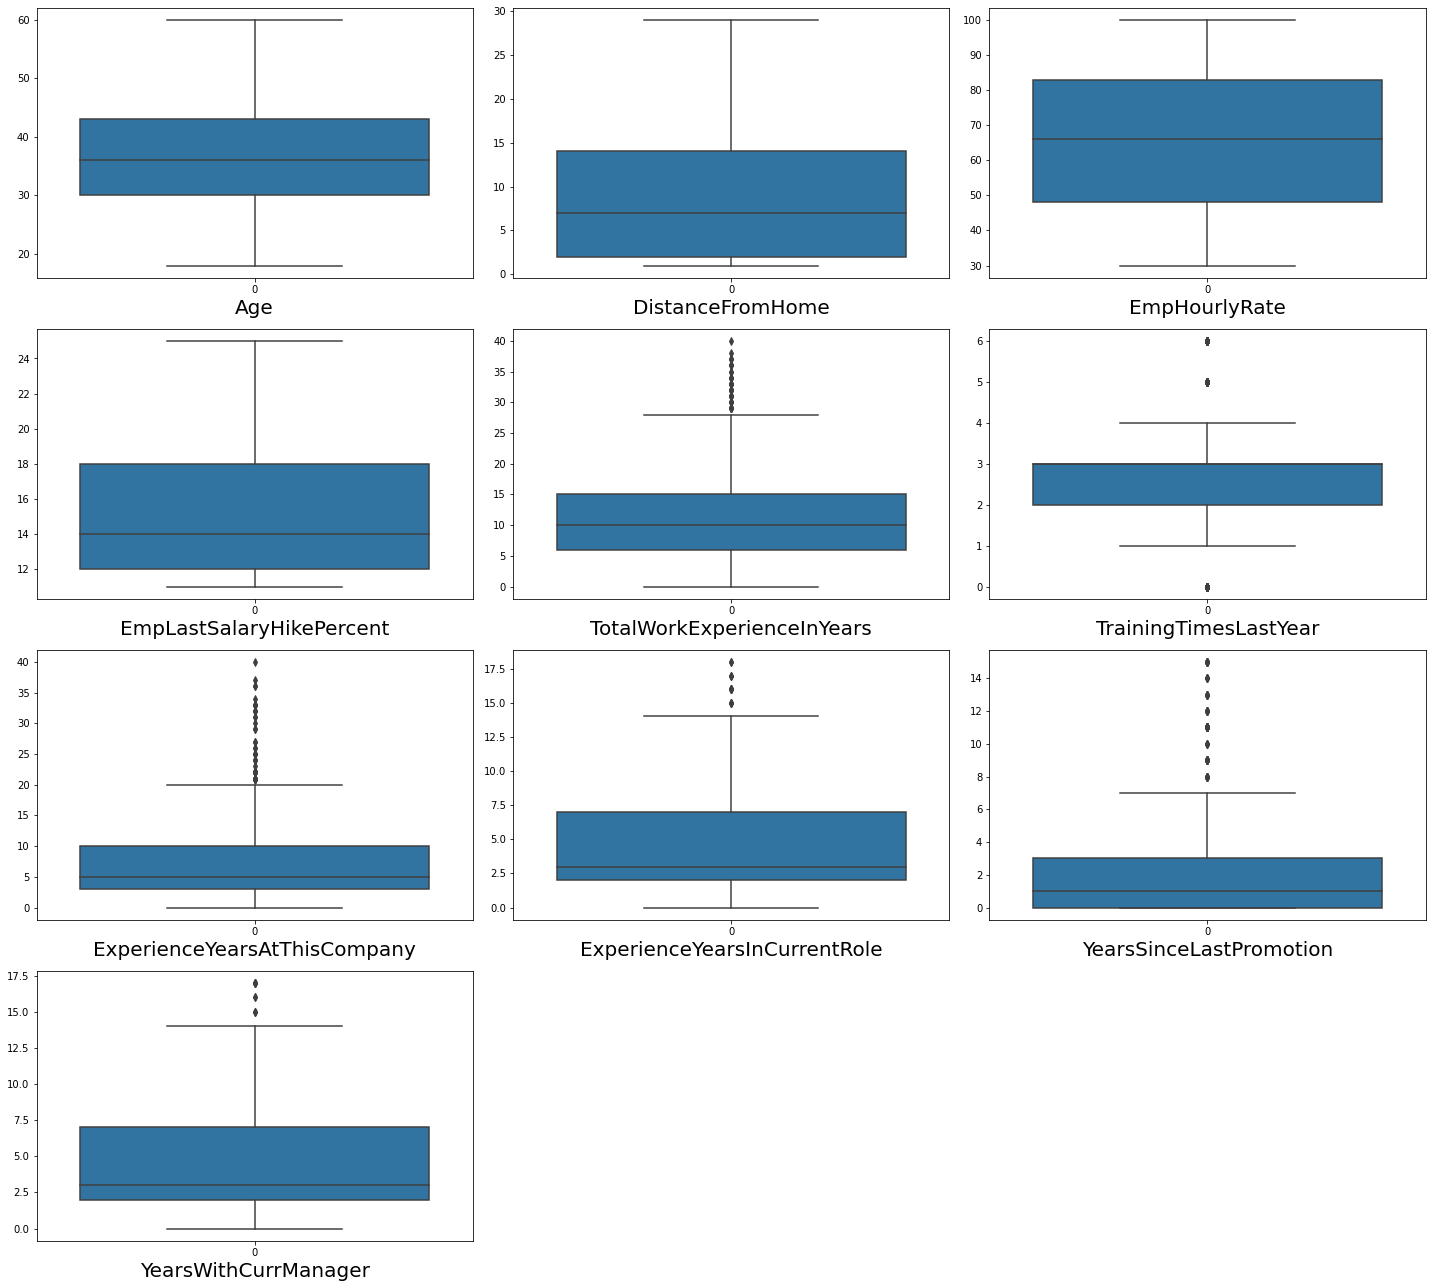

In [5]:
check = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) #Defining canvas size
plotno = 1 #Counter

for column in check: #Iteration of columns 
    if plotno<=12:    #Setting the limit
        plt.subplot(4,3,plotno) #Plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(check[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  #Assigning name to x-axis and font size is 20
    plotno+=1 #Counter increment
plt.tight_layout()
plt.show() #Used to hide the storage loction


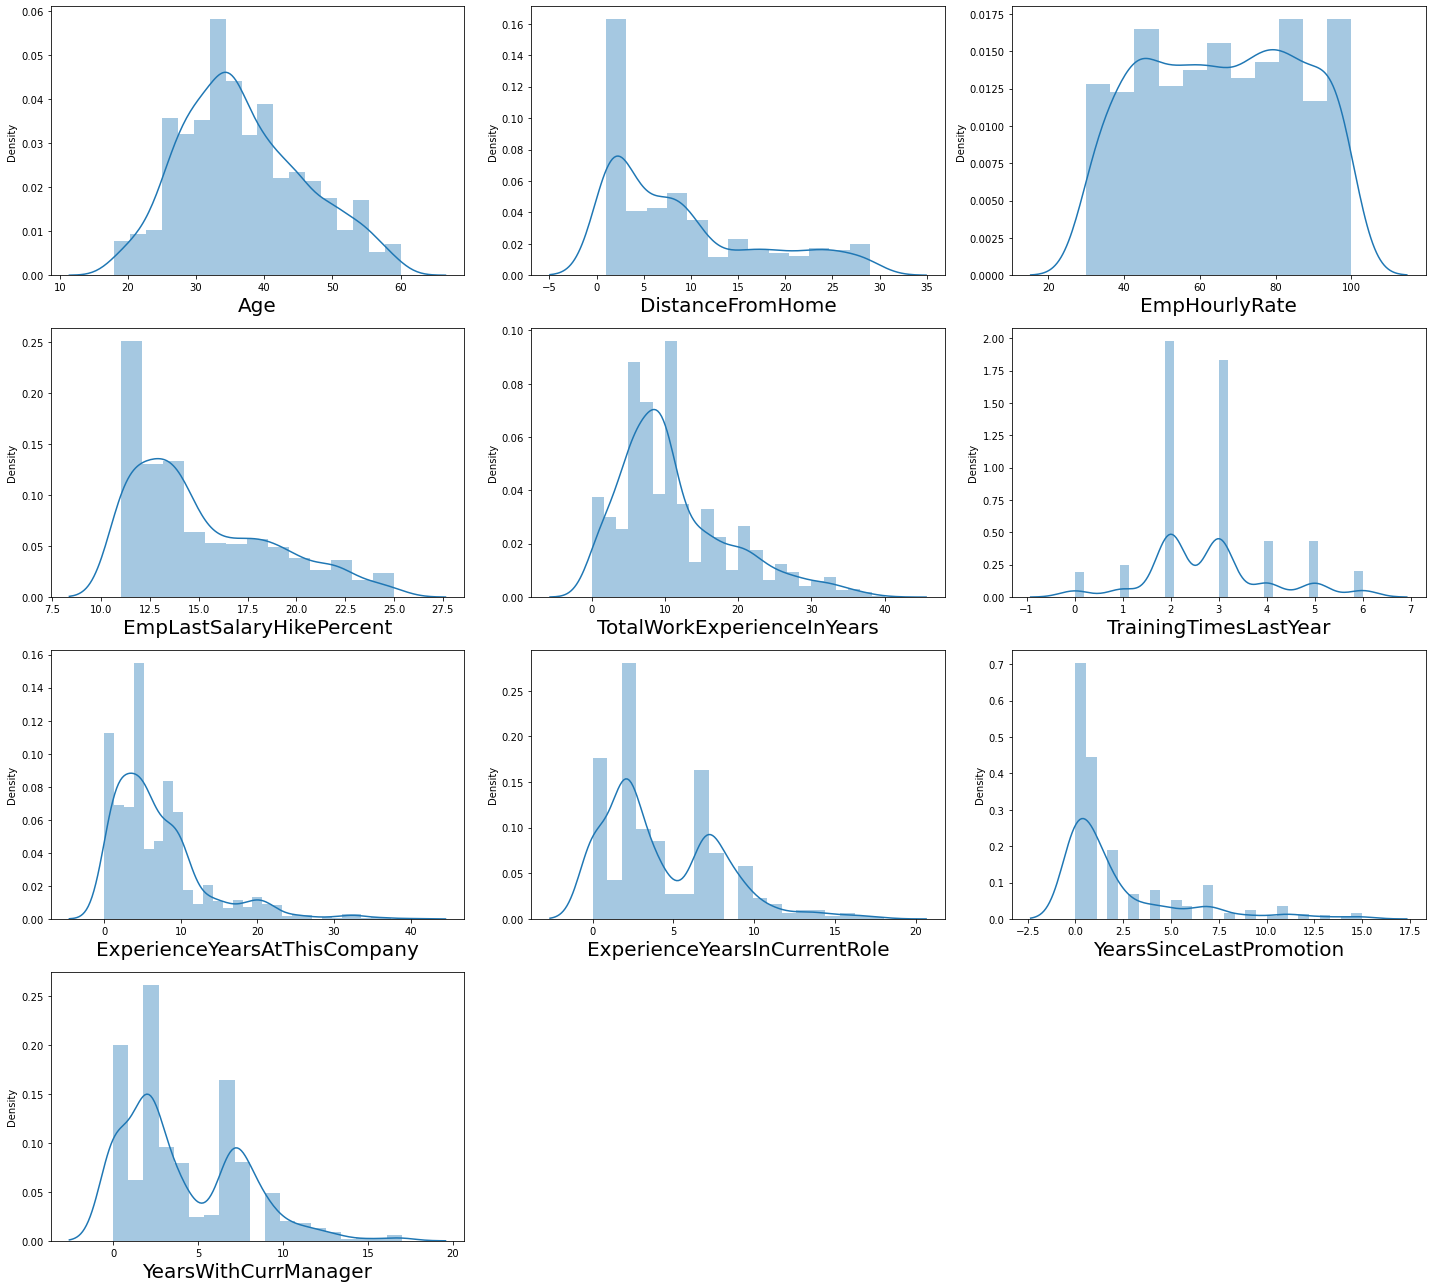

In [6]:
#Checking distribution
check = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) #Defining canvas size
plotno = 1 #Counter

for column in check: #Iteration of columns 
    if plotno<=12:    #Setting the limit
        plt.subplot(4,3,plotno) #Plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(check[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  #Assigning name to x-axis and font size is 20
    plotno+=1 #Counter increment
plt.tight_layout()
plt.show() #Used to hide the storage loction


# Handling Outliers

- Here as we can see **TotalWorkExperienceInYear**, **ExperienceYearsAtThisCompany** have outliers present in them but they are very close and can't be consider proper outliers as they might contain relevant or useful informations, so we will not handle them. 

- **TrainingTimesLastYear**, **ExperienceYearsInCurrentRoles**, and **YearsWithCurrManager** are discrete data as per the distribution so we will not handle them.

**YearsSinceLastPromotion**, has outliers and the data points are not close enough compared to the rest of the features, so we will handle it.

## Using IQR method because the distribution is skewed

- The interquartile range (IQR) is the range of values that resides in the middle of the scores. When a distribution is skewed, and the median is used instead of the mean to show a central tendency, the appropriate measure of variability is the Interquartile range.

In [7]:
iqr = stats.iqr(data['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [8]:
# checking data
data.loc[data['YearsSinceLastPromotion'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


- **We don't have any outliers present in Minimum limit**

In [9]:
# Checking data
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
11,E1001024,47,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,3,...,4,28,2,2,22,2,11,13,No,3
100,E1001183,50,Male,Life Sciences,Divorced,Development,Developer,Non-Travel,2,4,...,4,31,3,3,31,6,14,7,No,3
130,E1001239,31,Female,Medical,Married,Development,Developer,Travel_Rarely,12,3,...,3,10,2,1,9,7,8,5,No,3
132,E1001248,37,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,1,4,...,3,17,2,1,14,1,11,7,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,E100903,41,Female,Life Sciences,Married,Sales,Manager,Travel_Rarely,2,5,...,2,22,2,3,18,16,11,8,No,2
1160,E100922,50,Male,Medical,Married,Human Resources,Manager,Travel_Frequently,3,3,...,3,32,2,3,32,5,10,7,No,2
1181,E100961,34,Male,Life Sciences,Married,Development,Senior Developer,Travel_Rarely,1,5,...,4,10,4,2,10,9,8,8,No,3
1185,E100969,35,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,6,4,...,2,17,3,3,17,11,11,8,No,3


In [10]:
# imputing outlier
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

- **We had outliers present in Maximum limit so we handled it using median**

In [11]:
# Re-checking data
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


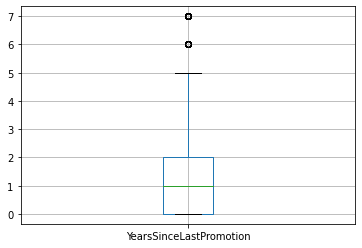

In [12]:
# Checking outliers after imputation
data.boxplot('YearsSinceLastPromotion')
plt.show()

- **As we can see we still have some outliers present in YearsSinceLastPromotion, so we will use some feature transformation method in order to deal with it**

# Feature Transformation

- **Using Q–Q plot (quantile-quantile plot) is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.**

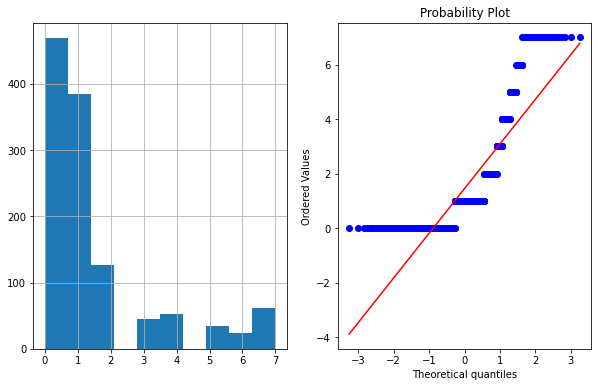

In [13]:
## If you want to check whether feature is guassian or normal distributed
def plot_data(df,feature): # defining function
    plt.figure(figsize=(10,6)) # defining canvas size
    plt.subplot(1,2,1)  # plotting graphs 
    df[feature].hist() # Plotting hist plot to detect the distribution
    plt.subplot(1,2,2) # plotting graph
    stats.probplot(df[feature],dist='norm',plot=pylab) # plotting probability plot
    plt.show() # used to hide the storage loction
    
plot_data(data,'YearsSinceLastPromotion') #plotting required feature

**Using square root transformation**

A square root transformation can be useful for:-

- Normalizing a skewed distribution
- Transforming a non-linear relationship between 2 variables into a linear one
- Focusing on visualizing certain parts of your data

In [14]:
data['YearsSinceLastPromotion_square'] = data.YearsSinceLastPromotion**(1/2)

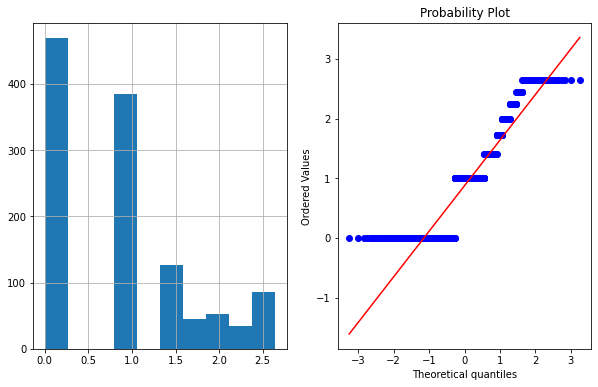

In [15]:
# plotting graph to review after imputation
plot_data(data,'YearsSinceLastPromotion_square')

- **As we can see, data points are closer to the line now.**

# Converting PerformanceRating into binary as it is our Target feature

- **'1'** represents Performing employees
- **'0'** represents not performing employess

In [16]:
data.PerformanceRating.replace([3,4],'1',inplace=True)
data.PerformanceRating.replace([2],'0',inplace=True)

In [17]:
#checking after conversion
data.PerformanceRating.value_counts()

1    1006
0     194
Name: PerformanceRating, dtype: int64

# Categorical Encoding

- Typically, any structured dataset includes multiple columns – a combination of numerical as well as categorical variables. A machine can only understand the numbers. It cannot understand the text. That’s primarily the reason we need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. This process is called categorical encoding.

In [18]:
#Getting all categorical features
list(data.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition',
 'PerformanceRating']

**Techniques used in categorical encoding are:-**
- **One hot encoding** - One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. 
- **Label Encoding** - Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

### Checking value counts of all categorical features

In [19]:
data.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [20]:
data.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [21]:
data.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [22]:
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [23]:
data.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [24]:
data.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [25]:
data.OverTime.value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [26]:
data.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [27]:
data.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

### Using One-hot-encoding to convert nominal data to numerical data

In [28]:
data.Gender=pd.get_dummies(data.Gender,drop_first=True)

### Using label encoder to convert the categorical data to numerical data

In [29]:
## Using label encoder to convert the categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.EducationBackground=lc.fit_transform(data.EducationBackground)
data.MaritalStatus=lc.fit_transform(data.MaritalStatus)
data.EmpDepartment=lc.fit_transform(data.EmpDepartment)
data.EmpJobRole=lc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency=lc.fit_transform(data.BusinessTravelFrequency)
data.OverTime=lc.fit_transform(data.OverTime)
data.Attrition=lc.fit_transform(data.Attrition)

In [30]:
#checking data after encoding 
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,YearsSinceLastPromotion_square
0,E1001000,32,1,2,2,5,13,2,10,3,...,10,2,2,10,7,0,8,0,1,0.000000
1,E1001006,47,1,2,2,5,13,2,14,4,...,20,2,3,7,7,1,7,0,1,1.000000
2,E1001007,40,1,1,1,5,13,1,5,4,...,20,2,3,18,13,1,12,0,1,1.000000
3,E1001009,41,1,0,0,3,8,2,10,4,...,23,2,2,21,6,1,6,0,1,1.000000
4,E1001010,60,1,2,2,5,13,2,16,4,...,10,1,3,2,2,2,2,0,1,1.414214


### Resetting Index columns

In [31]:
data=data.reindex(columns=['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsSinceLastPromotion_square','YearsWithCurrManager', 'Attrition', 'PerformanceRating'])

In [32]:
data.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsSinceLastPromotion_square,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,10,2,2,10,7,0,0.0,8,0,1
1,E1001006,47,1,2,2,5,13,2,14,4,...,20,2,3,7,7,1,1.0,7,0,1


# Feature Scaling using MinMaxScaler:-

- The MinMax scaler is one of the simplest scalers to understand.  It just scales all the data between 0 and 1. 

In [33]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsSinceLastPromotion_square', 'YearsWithCurrManager', 'Attrition',
       'PerformanceRating'],
      dtype='object')

In [34]:
##Saling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Age','Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked','OverTime','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','TotalWorkExperienceInYears','TrainingTimesLastYear','EmpWorkLifeBalance','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsSinceLastPromotion_square','YearsWithCurrManager', 'Attrition','PerformanceRating']]=scale.fit_transform(data[['Age','Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked', 'OverTime','EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TotalWorkExperienceInYears', 'TrainingTimesLastYear','EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsSinceLastPromotion_square','YearsWithCurrManager', 'Attrition','PerformanceRating']])

In [35]:
#Checking
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsSinceLastPromotion_square,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,0.333333,1.0,0.4,1.0,1.0,0.722222,1.0,0.321429,0.50,...,0.250,0.333333,0.333333,0.250,0.388889,0.000000,0.000000,0.470588,0.0,1.0
1,E1001006,0.690476,1.0,0.4,1.0,1.0,0.722222,1.0,0.464286,0.75,...,0.500,0.333333,0.666667,0.175,0.388889,0.142857,0.377964,0.411765,0.0,1.0
2,E1001007,0.523810,1.0,0.2,0.5,1.0,0.722222,0.5,0.142857,0.75,...,0.500,0.333333,0.666667,0.450,0.722222,0.142857,0.377964,0.705882,0.0,1.0
3,E1001009,0.547619,1.0,0.0,0.0,0.6,0.444444,1.0,0.321429,0.75,...,0.575,0.333333,0.333333,0.525,0.333333,0.142857,0.377964,0.352941,0.0,1.0
4,E1001010,1.000000,1.0,0.4,1.0,1.0,0.722222,1.0,0.535714,0.75,...,0.250,0.166667,0.666667,0.050,0.111111,0.285714,0.534522,0.117647,0.0,1.0


# Checking Correlation

- Correlation plots, also known as correlograms for more than two variables, help us to visualize the correlation between continuous variables.

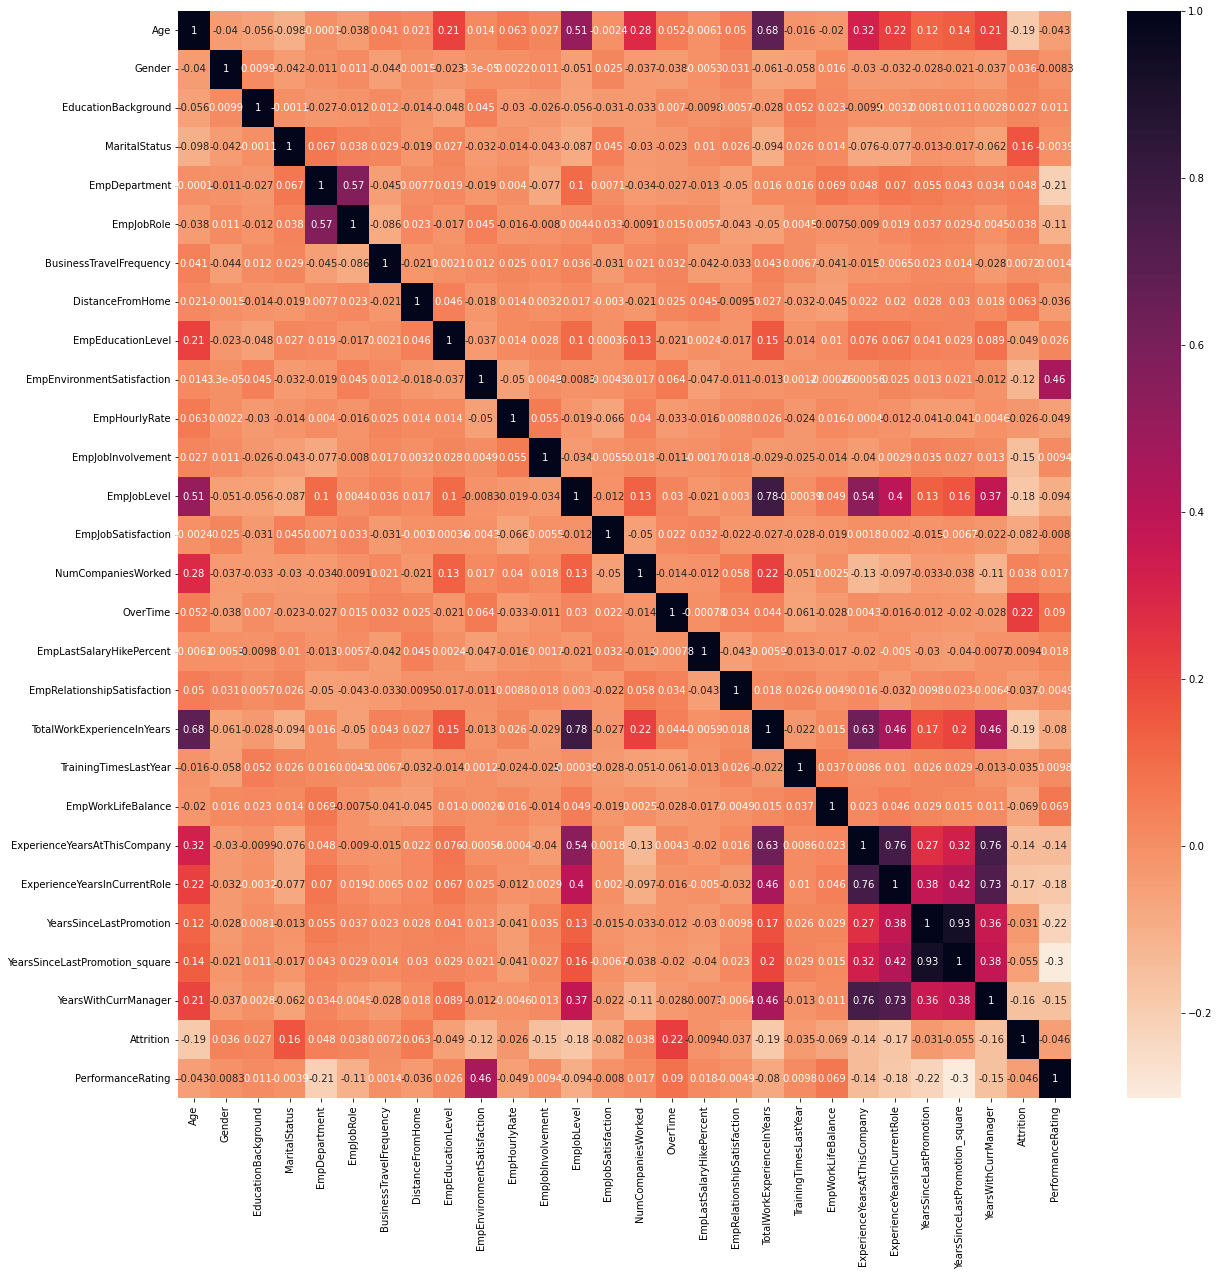

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='rocket_r')
plt.show()

In [37]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr
0,YearsSinceLastPromotion,YearsSinceLastPromotion_square,0.932728
1,YearsSinceLastPromotion_square,YearsSinceLastPromotion,0.932728


In [38]:
#dropping unique and highly correlated features
data.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

In [39]:
data.head(2)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion_square,YearsWithCurrManager,Attrition,PerformanceRating
0,0.333333,1.0,0.4,1.0,1.0,0.722222,1.0,0.321429,0.50,1.0,...,1.0,0.25,0.333333,0.333333,0.250,0.388889,0.000000,0.470588,0.0,1.0
1,0.690476,1.0,0.4,1.0,1.0,0.722222,1.0,0.464286,0.75,1.0,...,1.0,0.50,0.333333,0.666667,0.175,0.388889,0.377964,0.411765,0.0,1.0


# Feature importance:

In [40]:
#defining X and y 
X=data.iloc[0:,:-1]  #except the Target feature all are taken
y=data.PerformanceRating #only the target feature is taken

In [41]:
#Finding out the best feature which will contribute and have good relation with target variable.
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

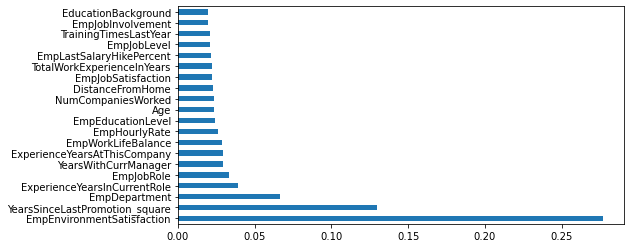

In [42]:
#plot graph of important features for better visualization
plt.figure(figsize = (8,4))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

- **The most important features are EmpEnvironmentSatisfaction followed by YearsSinceLastPromotion and EmpDepartment.**

# SAVING PRE-PROCESSED DATA

In [43]:
data.to_csv('Preprocessed_data.csv')

In [44]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion_square,YearsWithCurrManager,Attrition,PerformanceRating
0,0.333333,1.0,0.4,1.0,1.0,0.722222,1.0,0.321429,0.50,1.000000,...,1.000000,0.250,0.333333,0.333333,0.250,0.388889,0.000000,0.470588,0.0,1.0
1,0.690476,1.0,0.4,1.0,1.0,0.722222,1.0,0.464286,0.75,1.000000,...,1.000000,0.500,0.333333,0.666667,0.175,0.388889,0.377964,0.411765,0.0,1.0
2,0.523810,1.0,0.2,0.5,1.0,0.722222,0.5,0.142857,0.75,1.000000,...,0.666667,0.500,0.333333,0.666667,0.450,0.722222,0.377964,0.705882,0.0,1.0
3,0.547619,1.0,0.0,0.0,0.6,0.444444,1.0,0.321429,0.75,0.333333,...,0.333333,0.575,0.333333,0.333333,0.525,0.333333,0.377964,0.352941,0.0,1.0
4,1.000000,1.0,0.4,1.0,1.0,0.722222,1.0,0.535714,0.75,0.000000,...,1.000000,0.250,0.166667,0.666667,0.050,0.111111,0.534522,0.117647,0.0,1.0
